In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os

PROJ_ROOT = os.pardir

TRAIN_DATA = os.path.join(PROJ_ROOT, "data", "raw", "train.csv")
TEST_DATA = os.path.join(PROJ_ROOT, "data", "raw", "test.csv")

import sys
sys.path.append(os.path.join(PROJ_ROOT, "src"))

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from pandas_summary import DataFrameSummary
from IPython.display import display

In [48]:
PATH = os.path.join(PROJ_ROOT, "data", "raw/")

PATH


from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas_summary import DataFrameSummary
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
import math

In [9]:
train_df = pd.read_csv(f"{PATH}/bodyfat-train.csv")
test_df = pd.read_csv(f"{PATH}/bodyfat-test.csv")

## Structure
1. Data exploration
2. Feature Engineering
3. Train Test Split
4. Model evaluation and metrics
5. Ensembling
6. Results.


### Data Exploration

In [12]:
dfs = DataFrameSummary(train_df)

In [13]:
dfs.columns_types

numeric    14
Name: types, dtype: int64

In [14]:
dfs.columns_stats

,Body fat (%),Age (years),Weight (lbs),Height (inches),Neck (cm),Chest (cm),Abdomen (cm),Hip (cm),Thigh (cm),Knee (cm),Ankle (cm),Biceps (cm),Forearm (cm),Wrist (cm)
counts,201,201,201,201,201,201,201,201,201,201,201,201,201,201
uniques,149,49,165,43,84,144,160,136,133,87,57,101,74,41
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


mean                                                         18.9776
std                                                          8.39131
variance                                                     70.4141
min                                                                0
max                                                             47.5
5%                                                               5.7
25%                                                             12.5
50%                                                             19.2
75%                                                             24.7
95%                                                             32.6
iqr                                                             12.2
kurtosis                                                   -0.143742
skewness                                                    0.186942
sum                                                           3814.5
mad                               

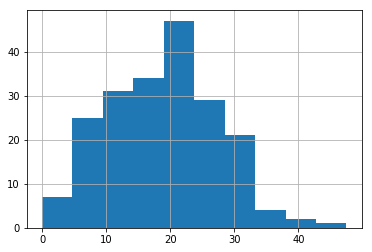

In [16]:
dfs["Body fat (%)"]

In [18]:
target = train_df["Body fat (%)"]

In [26]:
def create_ratio(df, col1, col2):
    col_name = f"{col1}_{col2}_ratio"
    df[col_name] = df[col1]/df[col2]
    return col_name

def feature_engineering_create_ratios(df):
    """Do not pass target in the df. It will be scaled."""
    columns = list(df.columns)
    ratio_list = combinations(columns, 2)
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
    return ret

#### Find outliers.
We need to scatter plot all the columns to find outliers. Below cell does that.

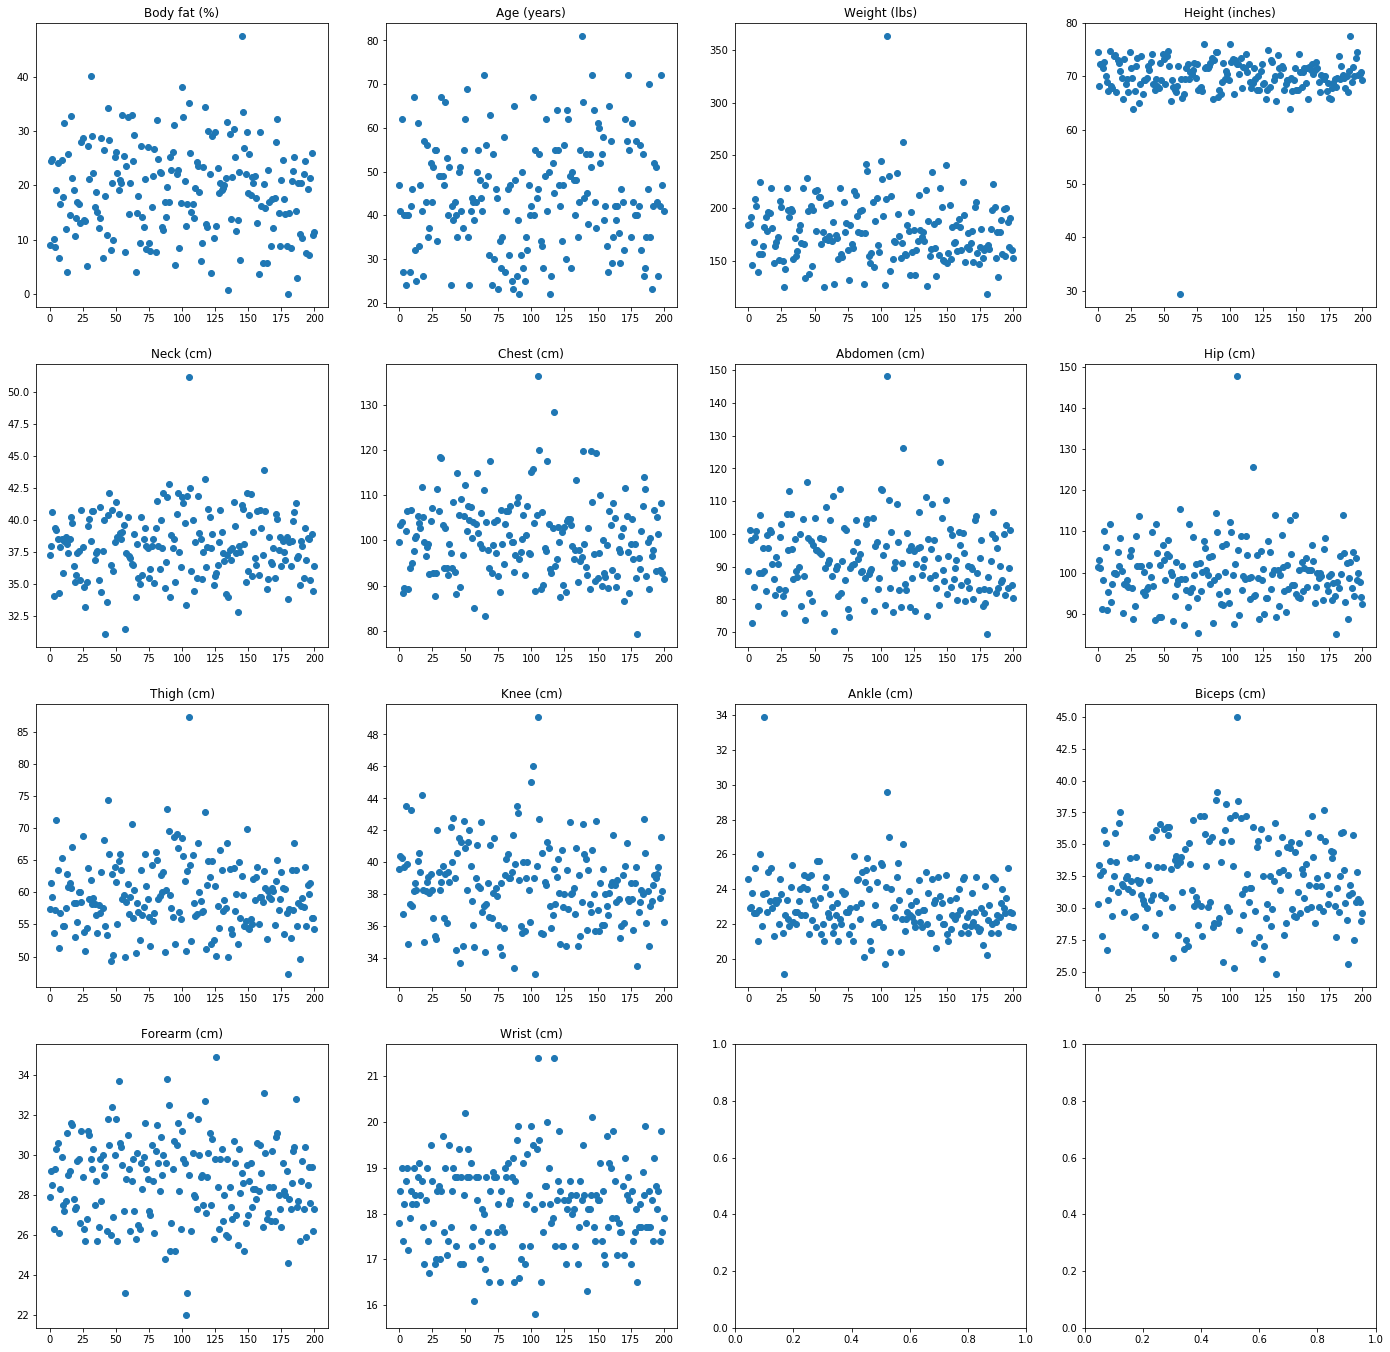

In [51]:
cols = list(train_df.columns)
n = math.ceil(math.sqrt(len(cols)))
columns=n
rows=n
fig, ax_array = plt.subplots(rows, columns, squeeze=False)
fig.set_size_inches(24, 24)
for i, ax_row in enumerate(ax_array):
    for j, axes in enumerate(ax_row):
        if rows * i + j < len(cols):
            col = cols[rows * i + j]
            axes.set_title(col)
            axes.scatter(list((range(201))), train_df[col])
plt.show()

#### Remove outliers
We can easily eyeball outliers in the above graph. Now we can cleanit using statistics



In [56]:
data_mean, data_std = train_df.mean(), train_df.std(); data_mean, data_std

(Body fat (%)        18.977612
 Age (years)         44.631841
 Weight (lbs)       178.370398
 Height (inches)     70.009950
 Neck (cm)           37.992537
 Chest (cm)         100.500000
 Abdomen (cm)        92.392537
 Hip (cm)            99.885572
 Thigh (cm)          59.407960
 Knee (cm)           38.574627
 Ankle (cm)          23.060697
 Biceps (cm)         32.197015
 Forearm (cm)        28.645771
 Wrist (cm)          18.216418
 dtype: float64, Body fat (%)        8.391314
 Age (years)        12.462896
 Weight (lbs)       30.489848
 Height (inches)     3.859877
 Neck (cm)           2.549803
 Chest (cm)          8.508314
 Abdomen (cm)       10.973468
 Hip (cm)            7.399307
 Thigh (cm)          5.503221
 Knee (cm)           2.481875
 Ankle (cm)          1.647027
 Biceps (cm)         3.196043
 Forearm (cm)        2.080167
 Wrist (cm)          0.935189
 dtype: float64)

In [30]:
train_processed = feature_engineering_create_ratios(train_df.drop("Body fat (%)", axis=1))
test_processed = feature_engineering_create_ratios(test_df)

In [29]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(train_X, train_y)

In [ ]:
r2_score(model.predict(test_X), test_y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(model.predict(test_X), test_y)

In [ ]:
train_df.corr()["Body fat (%)"]

In [ ]:
train_df["height_to_weight_ratio"] = train_df["Height (inches)"] / train_df["Weight (lbs)"]

In [ ]:
train_df["chest_to_hip_ratio"] = train_df["Chest (cm)"] / train_df["Hip (cm)"]

In [ ]:
train_df["age_to_weight_ratio"] = train_df["Age (years)"] / train_df["Weight (lbs)"]

In [ ]:
train_df["knee_to_thigh_ratio"] = train_df["Knee (cm)"] / train_df["Thigh (cm)"]

In [ ]:
train_df["chest_to_abdomen_ratio"] = train_df["Chest (cm)"] / train_df["Abdomen (cm)"]

In [ ]:
columns_to_train = ["height_to_weight_ratio", "chest_to_hip_ratio", "age_to_weight_ratio",
                    "knee_to_thigh_ratio", "chest_to_abdomen_ratio", "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)"
                   ]

In [ ]:
col_names = []
def create_ratio(df, col1, col2):
    col_name = f"{col1}_{col2}_ratio"
    df[col_name] = df[col1]/df[col2]
    return col_name
ratio_list = [
    ("Height (inches)", "Weight (lbs)"),
    ("Chest (cm)", "Hip (cm)"),
    ("Age (years)", "Weight (lbs)"),
    ("Knee (cm)", "Thigh (cm)"),
    ("Chest (cm)", "Abdomen (cm)"),    
]
for col1, col2 in ratio_list:
    col_names.append(create_ratio(test_df, col1, col2))
col_names

In [ ]:
test_cols = ['Height (inches)_Weight (lbs)_ratio',
 'Chest (cm)_Hip (cm)_ratio',
 'Age (years)_Weight (lbs)_ratio',
 'Knee (cm)_Thigh (cm)_ratio',
 'Chest (cm)_Abdomen (cm)_ratio', 
             "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)", "Weight (lbs)"
            ]

In [ ]:
len(test_cols), len(columns_to_train)

In [ ]:
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
models = [RandomForestRegressor, GradientBoostingRegressor, LGBMRegressor, XGBRegressor, ExtraTreesRegressor, AdaBoostRegressor,
          BaggingRegressor, SVR, LinearRegression, Ridge, Lasso]

In [ ]:
train_df.columns

In [ ]:
columns_to_train = [ "Height (inches)", "Age (years)",
                    "Abdomen (cm)", "Neck (cm)", "Weight (lbs)", 'Chest (cm)',
                    'chest_to_abdomen_ratio', 'chest_to_hip_ratio', 'height_to_weight_ratio'
                    
                   ]

In [ ]:
columns_to_train = ['Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)',
       'height_to_weight_ratio', 'chest_to_hip_ratio', 'age_to_weight_ratio',
       'knee_to_thigh_ratio', 'chest_to_abdomen_ratio',
       'Height (inches)_Weight (lbs)_ratio']

In [ ]:
columns_to_train = ['Age (years)', 'Weight (lbs)', 'Height (inches)',
       'Neck (cm)', 'Chest (cm)', 'Abdomen (cm)', 'Hip (cm)', 'Thigh (cm)',
       'Knee (cm)', 'Ankle (cm)', 'Biceps (cm)', 'Forearm (cm)', 'Wrist (cm)']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target, random_state=42, test_size=0.2)
d = {}
for model in models:
    print(f"Training {str(model).split('.')[-1][:-2]}")
    d[model] = model()
    d[model].fit(train_X, train_y)
    pred = d[model].predict(test_X)
    r2 = r2_score(pred, test_y)
    mas = mean_absolute_error(pred, test_y)
    msle=0
#     msle = mean_squared_log_error(pred, test_y)
    print(f"r2: {r2}, msle: {msle}, mas: {mas}, {str(model).split('.')[-1][:-2]}")
    d[model] = [d[model], r2, mas]
    

In [ ]:
lass = d[Lasso][0]

In [ ]:
pred = lass.predict(test_df[test_cols])

In [ ]:
pred

In [ ]:
subm_df = pd.read_csv("../data/raw/kaggle_solution_template.csv")

In [ ]:
subm_df.head()

In [ ]:
subm_df["Body fat(%)"] = pred

In [ ]:
subm_df.head()

In [ ]:
subm_df.to_csv("../data/raw/submission.csv", index=None)

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=0.5)

In [ ]:
model.fit(train_X, train_y)

In [ ]:
mean_absolute_error(model.predict(test_X), test_y)

In [ ]:
draw_tree(model.estimators_[2], train_X, precision=3)

In [ ]:
train_X.head()

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [ ]:
fi = rf_feat_importance(model, train_X); fi[:20]

In [ ]:
plot_fi(fi)

In [ ]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(train_processed, target)

In [ ]:
model = RandomForestRegressor(max_features=0.5, n_estimators=100)

In [ ]:
model.fit(train_X, train_y)

In [ ]:
mean_absolute_error(model.predict(test_X), test_y)

In [ ]:
def feature_engineering(df):
    """Do not pass target in the df. It will be scaled."""
    columns = list(df.columns)
    ratio_list = combinations(columns, 2)
    ret = df.copy()
    for col1, col2 in ratio_list:
        create_ratio(ret, col1, col2)
#     scaler = MinMaxScaler()
#     return scaler.fit_transform(ret)
    return ret

In [ ]:
train_processed = feature_engineering(train_df.drop(['Body fat (%)'], axis=1))

In [ ]:
l

In [ ]:
from itertools import combinations

In [ ]:
list(combinations(l, 2))

## Neural Network